Розмір таблиці: (3900, 19)
Пропуски в даних:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       obje

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

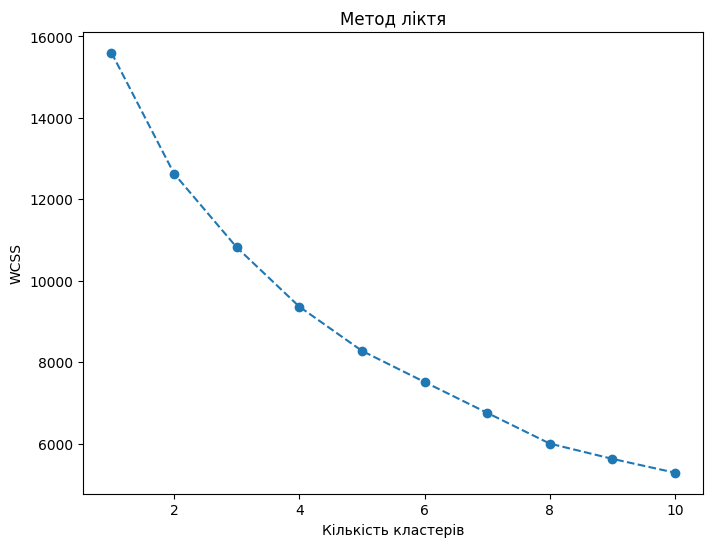

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


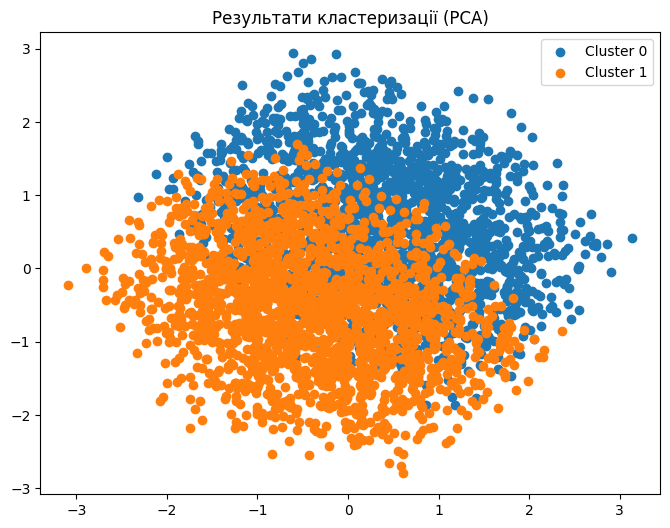

In [5]:
# Завдання 1

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Завантаження файлу shopping_trends.csv
data = pd.read_csv('./shopping_trends.csv')

# Перевірка розміру таблиці, наявність пропусків та типів стовпців
print("Розмір таблиці:", data.shape)
print("Пропуски в даних:")
print(data.isnull().sum())
print("Типи стовпців:")
print(data.dtypes)

# Вибір числових стовпців і перейменування
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
data_numeric = data[selected_columns]
data_numeric.columns = [col.lower().replace(" ", "_") for col in data_numeric.columns]

# Масштабування даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Визначення оптимальної кількості кластерів за методом ліктя
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

# Вибір оптимальної кількості кластерів (ліктьова точка)
optimal_clusters = 2

# Кластеризація за допомогою K-means
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Візуалізація результатів (використовуючи PCA для зменшення розмірності)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    plt.scatter(data_pca[data['Cluster'] == cluster, 0], data_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Результати кластеризації (PCA)')
plt.legend()
plt.show()
